# AirZoon Presence Analysis

AirZoon is a company that offers wireless internet service at various consumer locations. AirZoon offers internet service to members who enroll in a subscription service. 

We have millions of data collected on the presence of its users on the network. This data will be analyzed and will be the main object of our study.

### Audience
1. Airzoon executive team
2. French Government 
3. Health officials 

#### Other stakeholders (Potential)
 a. Financial authorities <br/>
 b. Bank and other financial institutions <br/>
 c. Schools

### Data Source
AirZoon Wifi software creates a record for each internet capable device that enters within the routers range. This data is stored as flat S3 log files within the 
 environment.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df_first = pd.read_csv('first_data.csv')
df_first

,Unnamed: 0,Unnamed: 0.1,mac,count,min_signal,max_signal,avg_signal,last_seen_signal,first_seen,last_seen,associated,node_mac,Unnamed: 11
0,0,0,00:71:c2:19:b4:f5,6.0,-78.0,-58.0,-65.0,-68.0,1583035162,1.583035e+09,0.0,AC:86:74:92:C5:58,NaN
1,1,1,18:a6:f7:0c:40:dd,76.0,-83.0,-51.0,-60.0,-66.0,1583035163,1.583035e+09,0.0,AC:86:74:92:C5:58,NaN
2,2,2,00:71:c2:19:b4:f5,12.0,-80.0,-62.0,-68.0,-64.0,1583035161,1.583035e+09,0.0,AC:86:74:73:BC:08,NaN
3,3,3,18:a6:f7:0c:40:dd,93.0,-77.0,-72.0,-74.0,-75.0,1583035161,1.583035e+09,1.0,AC:86:74:73:BC:08,NaN
4,4,4,7a:fc:1e:9a:a9:ae,2.0,-72.0,-69.0,-70.0,-69.0,1583035164,1.583035e+09,0.0,AC:86:74:73:BC:08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,8a:2e:3b:f6:84:b7,6.0,-68.0,-64.0,-66.0,-64.0,1583063744,1.583064e+09,0.0,AC:86:74:92:C5:58,NaN
9996,9996,9996,92:46:45:fd:1d:21,13.0,-69.0,-58.0,-64.0,-58.0,1583063726,1.583064e+09,0.0,AC:86:74:92:C5:58,NaN
9997,9997,9997,9e:70:ec:da:6d:b4,8.0,-78.0,-55.0,-62.0,-75.0,1583063744,1.583064e+09,0.0,AC:86:74:92:C5:58,NaN
9998,9998,9998,a4:77:33:6d:42:98,5.0,-90.0,-88.0,-89.0,-90.0,1583063744,1.583064e+09,0.0,AC:86:74:92:C5:58,NaN


In [3]:
df_first = df_first.drop(columns={'Unnamed: 0','Unnamed: 0.1','Unnamed: 11'})

In [4]:
df_first

,mac,count,min_signal,max_signal,avg_signal,last_seen_signal,first_seen,last_seen,associated,node_mac
0,00:71:c2:19:b4:f5,6.0,-78.0,-58.0,-65.0,-68.0,1583035162,1.583035e+09,0.0,AC:86:74:92:C5:58
1,18:a6:f7:0c:40:dd,76.0,-83.0,-51.0,-60.0,-66.0,1583035163,1.583035e+09,0.0,AC:86:74:92:C5:58
2,00:71:c2:19:b4:f5,12.0,-80.0,-62.0,-68.0,-64.0,1583035161,1.583035e+09,0.0,AC:86:74:73:BC:08
3,18:a6:f7:0c:40:dd,93.0,-77.0,-72.0,-74.0,-75.0,1583035161,1.583035e+09,1.0,AC:86:74:73:BC:08
4,7a:fc:1e:9a:a9:ae,2.0,-72.0,-69.0,-70.0,-69.0,1583035164,1.583035e+09,0.0,AC:86:74:73:BC:08
...,...,...,...,...,...,...,...,...,...,...
9995,8a:2e:3b:f6:84:b7,6.0,-68.0,-64.0,-66.0,-64.0,1583063744,1.583064e+09,0.0,AC:86:74:92:C5:58
9996,92:46:45:fd:1d:21,13.0,-69.0,-58.0,-64.0,-58.0,1583063726,1.583064e+09,0.0,AC:86:74:92:C5:58
9997,9e:70:ec:da:6d:b4,8.0,-78.0,-55.0,-62.0,-75.0,1583063744,1.583064e+09,0.0,AC:86:74:92:C5:58
9998,a4:77:33:6d:42:98,5.0,-90.0,-88.0,-89.0,-90.0,1583063744,1.583064e+09,0.0,AC:86:74:92:C5:58


In [5]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mac               10000 non-null  object 
 1   count             10000 non-null  float64
 2   min_signal        10000 non-null  float64
 3   max_signal        10000 non-null  float64
 4   avg_signal        10000 non-null  float64
 5   last_seen_signal  10000 non-null  float64
 6   first_seen        10000 non-null  int64  
 7   last_seen         10000 non-null  float64
 8   associated        10000 non-null  float64
 9   node_mac          10000 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 781.4+ KB


In [6]:
# convert first_seen and last_seen columns to datetime
df_first['first_seen'] = pd.to_datetime(df_first['first_seen'])
df_first['last_seen'] = pd.to_datetime(df_first['last_seen'])

In [97]:
df_first.isnull().sum()

mac                 0
count               0
min_signal          0
max_signal          0
avg_signal          0
last_seen_signal    0
first_seen          0
last_seen           0
associated          0
node_mac            0
dtype: int64

In [8]:
df_first.describe()

,count,min_signal,max_signal,avg_signal,last_seen_signal,associated
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.600800,-82.576000,-74.981600,-77.766900,-79.789100,0.007500
std,8.236493,7.448085,13.741395,11.067177,9.588087,0.086281
min,1.000000,-94.000000,-94.000000,-94.000000,-94.000000,0.000000
25%,2.000000,-90.000000,-88.000000,-88.000000,-89.000000,0.000000
50%,5.000000,-83.000000,-77.000000,-79.000000,-81.000000,0.000000
75%,10.000000,-77.000000,-65.000000,-70.000000,-72.000000,0.000000
max,152.000000,-50.000000,-23.000000,-38.000000,-28.000000,1.000000


In [99]:
df_first.columns

Index(['mac', 'count', 'min_signal', 'max_signal', 'avg_signal',
       'last_seen_signal', 'first_seen', 'last_seen', 'associated',
       'node_mac'],
      dtype='object')

In [101]:
# find outliers
col =['count','min_signal', 'max_signal','avg_signal','last_seen_signal']
Q1 = df_first[col].describe().T['25%']
Q3 = df_first[col].describe().T['75%']
train_IQR = Q3-Q1
train_IQR

count                8.0
min_signal          13.0
max_signal          23.0
avg_signal          18.0
last_seen_signal    17.0
dtype: float64

In [103]:

MIN_RANGE = Q1 - 1.5 * train_IQR
MAX_RANGE = Q3+ 1.5 *train_IQR
train_out = df_first[~((df_first[col] < MIN_RANGE) |(df_first[col] > MAX_RANGE)).any(axis =1)]
print(train_out.shape)
df_first = train_out
df_first

(9680, 10)


,mac,count,min_signal,max_signal,avg_signal,last_seen_signal,first_seen,last_seen,associated,node_mac
0,00:71:c2:19:b4:f5,6.0,-78.0,-58.0,-65.0,-68.0,1970-01-01 00:00:01.583035162,1970-01-01 00:00:01.583035163,0.0,AC:86:74:92:C5:58
2,00:71:c2:19:b4:f5,12.0,-80.0,-62.0,-68.0,-64.0,1970-01-01 00:00:01.583035161,1970-01-01 00:00:01.583035172,0.0,AC:86:74:73:BC:08
4,7a:fc:1e:9a:a9:ae,2.0,-72.0,-69.0,-70.0,-69.0,1970-01-01 00:00:01.583035164,1970-01-01 00:00:01.583035164,0.0,AC:86:74:73:BC:08
5,d8:97:ba:42:71:3e,1.0,-88.0,-88.0,-88.0,-88.0,1970-01-01 00:00:01.583035165,1970-01-01 00:00:01.583035165,0.0,AC:86:74:73:BC:08
6,00:71:c2:19:b4:f5,17.0,-74.0,-55.0,-61.0,-70.0,1970-01-01 00:00:01.583035200,1970-01-01 00:00:01.583035220,0.0,AC:86:74:92:C5:58
...,...,...,...,...,...,...,...,...,...,...
9995,8a:2e:3b:f6:84:b7,6.0,-68.0,-64.0,-66.0,-64.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58
9996,92:46:45:fd:1d:21,13.0,-69.0,-58.0,-64.0,-58.0,1970-01-01 00:00:01.583063726,1970-01-01 00:00:01.583063738,0.0,AC:86:74:92:C5:58
9997,9e:70:ec:da:6d:b4,8.0,-78.0,-55.0,-62.0,-75.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58
9998,a4:77:33:6d:42:98,5.0,-90.0,-88.0,-89.0,-90.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58


#### Correlation by associated or not

In [104]:
corr_col = df_first[['mac', 'count', 'min_signal', 'max_signal', 'avg_signal',
       'last_seen_signal', 'first_seen', 'last_seen', 'associated',
       'node_mac']]

In [105]:
corr_cat = corr_col.corr().sort_values(by='associated')
corr_cat

,count,min_signal,max_signal,avg_signal,last_seen_signal,associated
count,1.000000,0.466495,0.781491,0.723493,0.585932,-0.012987
max_signal,0.781491,0.855105,1.000000,0.989580,0.895335,0.106604
avg_signal,0.723493,0.910083,0.989580,1.000000,0.922042,0.120277
min_signal,0.466495,1.000000,0.855105,0.910083,0.903779,0.140311
last_seen_signal,0.585932,0.903779,0.895335,0.922042,1.000000,0.150041
associated,-0.012987,0.140311,0.106604,0.120277,0.150041,1.000000


##### Group first_seen and last_seen by count columns

In [106]:
print('Count min_value:',df_first['count'].min(),'\n', 'Count max_value:' ,df_first['count'].max() )


Count min_value: 1.0 
 Count max_value: 22.0


In [107]:
count_group1 = df_first.groupby('min_signal')['count'].count().to_frame()
count_group1

,count
min_signal,
-94.0,9
-93.0,144
-92.0,530
-91.0,874
-90.0,1086
-89.0,709
-88.0,380
-87.0,279
-86.0,232


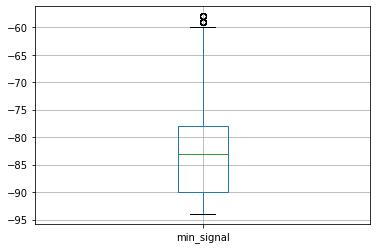

In [108]:
df_first[['min_signal']].boxplot()

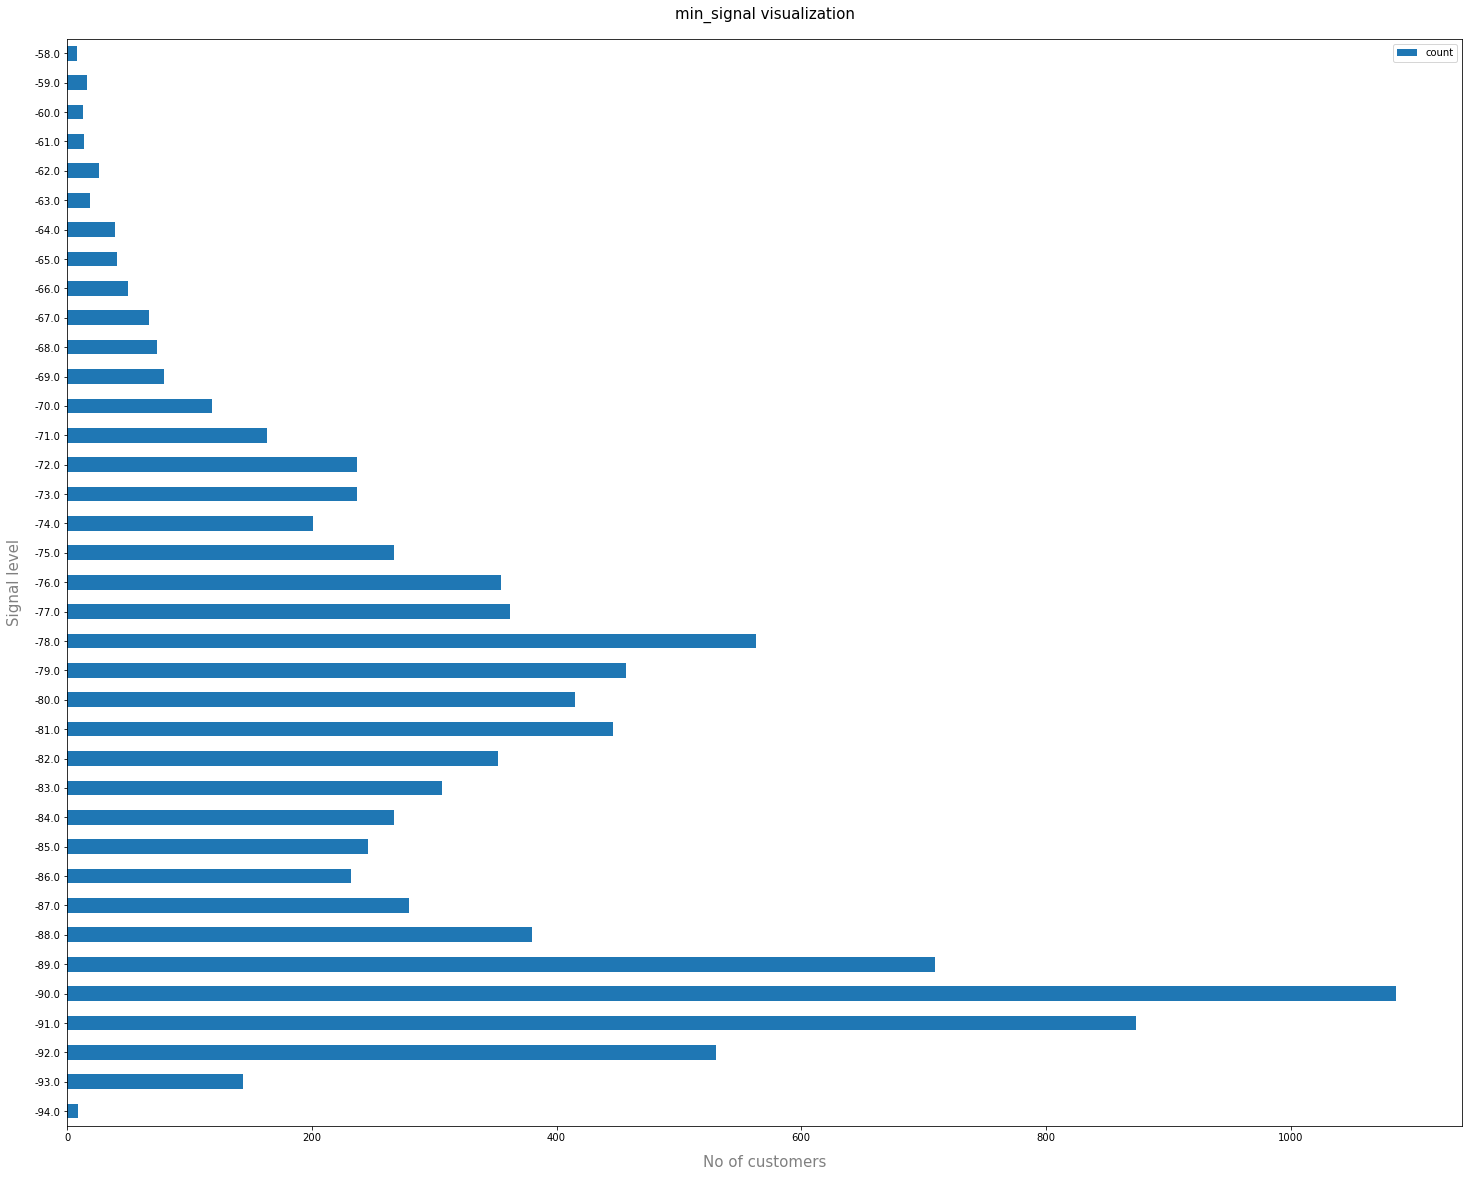

In [109]:
# plot min_signal
count_group1.plot(kind='barh', figsize=(25, 20))
plt.xlabel('No of customers', size=15, labelpad=12, color='grey')
plt.ylabel('Signal level', size=15, labelpad=12, color='grey')
plt.title("min_signal visualization", size=15, pad=20)
plt.show()

In [110]:
# Max_signal
count_group2 = df_first.groupby('max_signal')['count'].count().to_frame()
count_group2

,count
max_signal,
-94.0,8
-93.0,71
-92.0,293
-91.0,481
-90.0,484
-89.0,583
-88.0,693
-87.0,495
-86.0,327


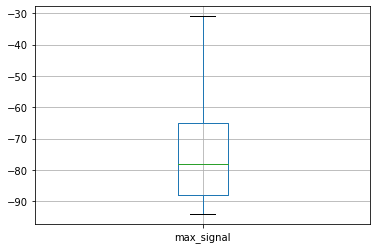

In [111]:
df_first[['max_signal']].boxplot()

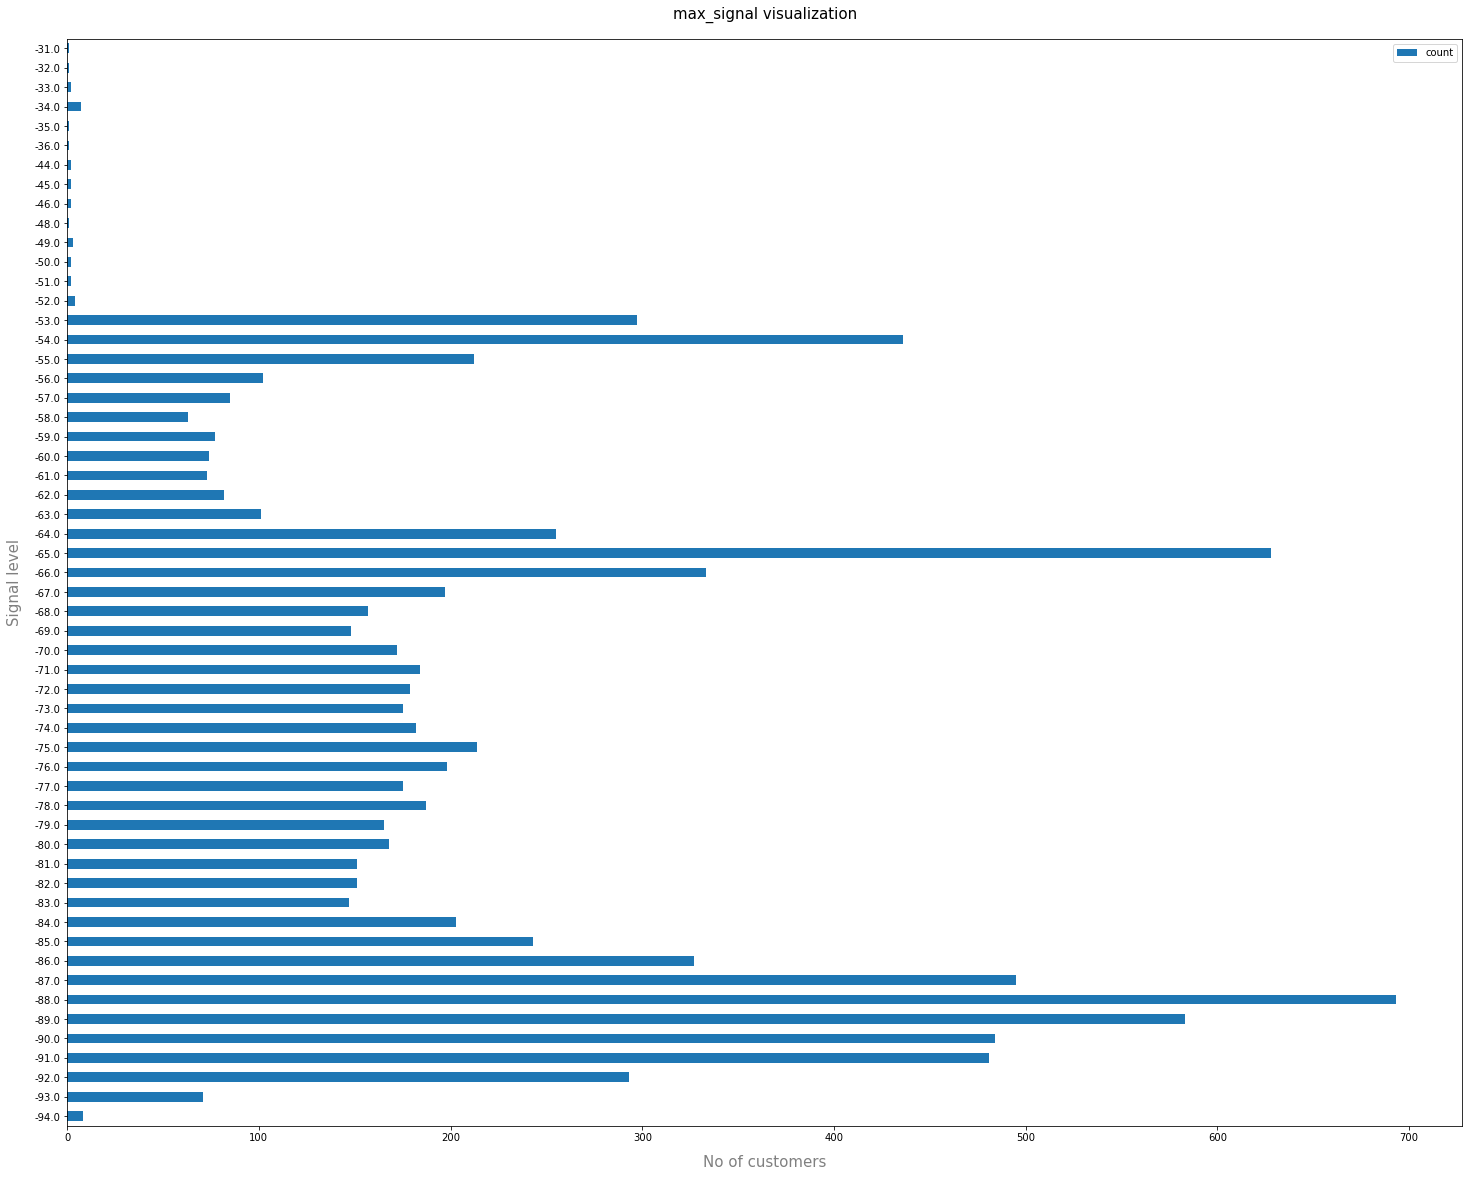

In [112]:
count_group2.plot(kind='barh', figsize=(25, 20))
plt.xlabel('No of customers', size=15, labelpad=12, color='grey')
plt.ylabel('Signal level', size=15, labelpad=12, color='grey')
plt.title("max_signal visualization", size=15, pad=20)
plt.show()

In [113]:
# avg_signal
count_group3 = df_first.groupby('avg_signal')['count'].count().to_frame()
count_group3

,count
avg_signal,
-94.0,8
-93.0,71
-92.0,313
-91.0,532
-90.0,593
-89.0,852
-88.0,747
-87.0,366
-86.0,243


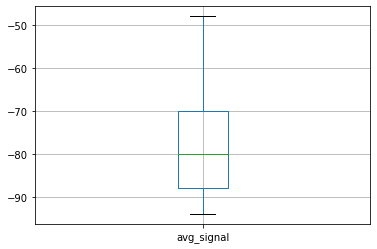

In [114]:
df_first[['avg_signal']].boxplot()

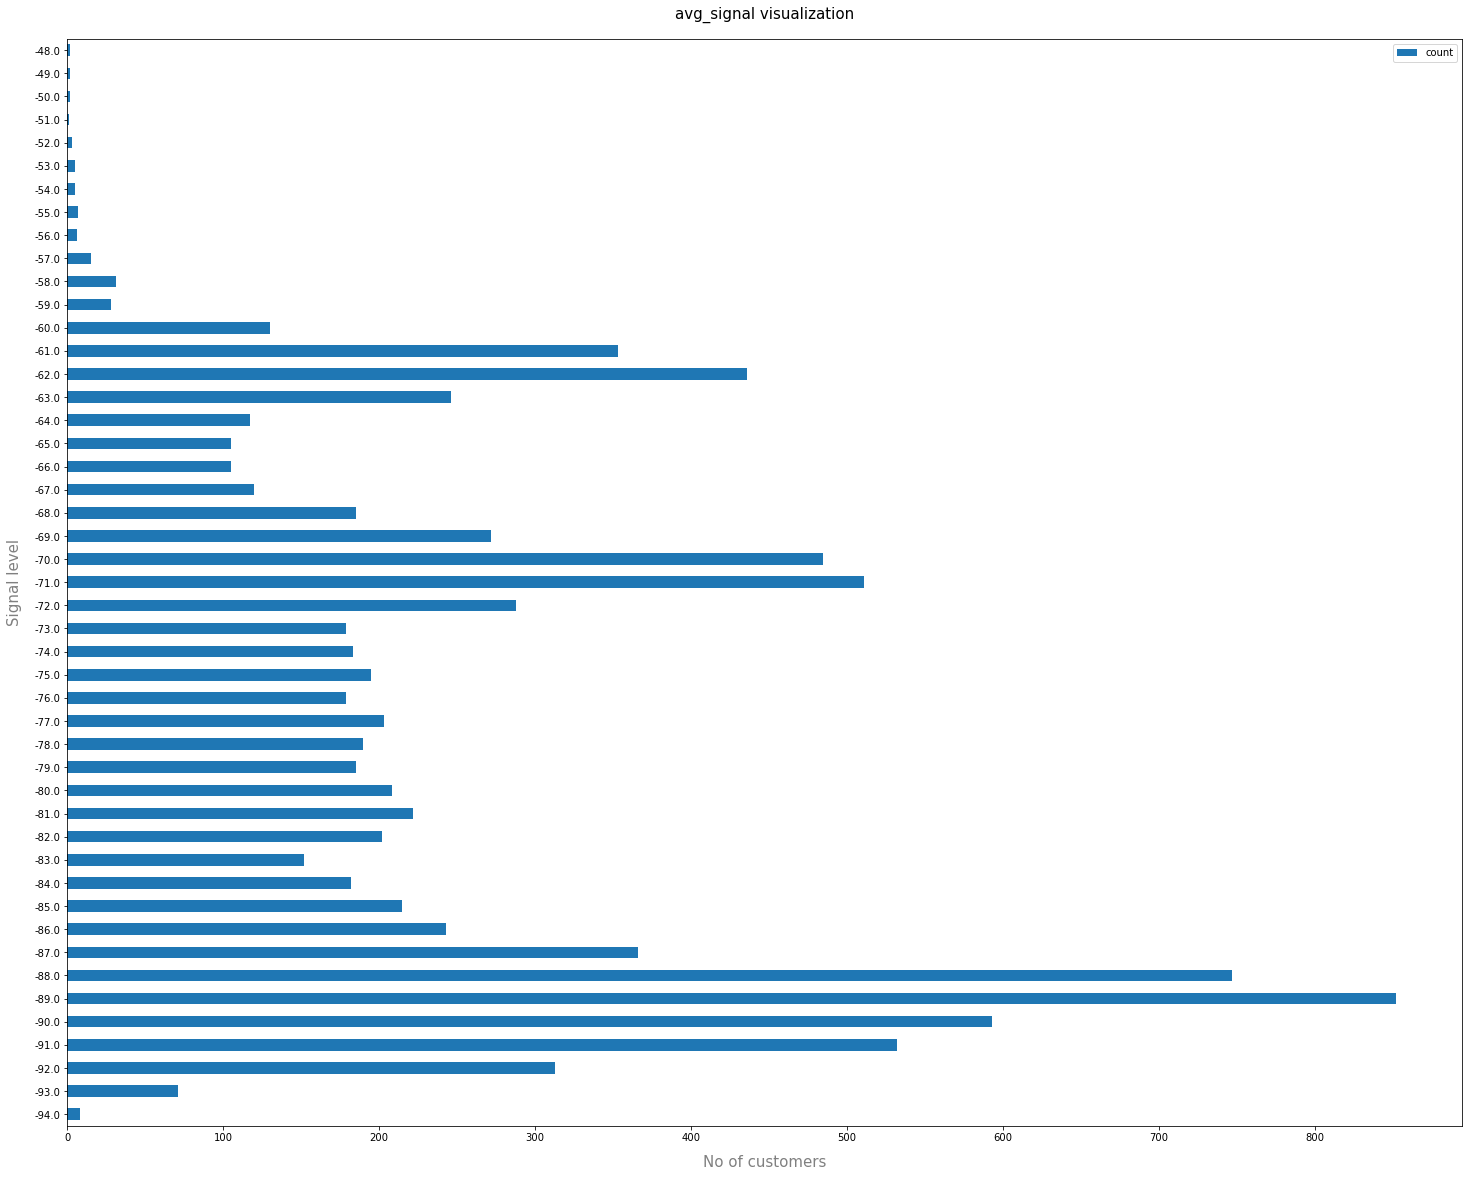

In [115]:
count_group3.plot(kind='barh', figsize=(25, 20))
plt.xlabel('No of customers', size=15, labelpad=12, color='grey')
plt.ylabel('Signal level', size=15, labelpad=12, color='grey')
plt.title("avg_signal visualization", size=15, pad=20)
plt.show()

##### grouping node_mac and associated columns by count column

In [116]:
# grouping 
df_gptest = df_first[['node_mac','associated','count']]
grouped_test1 = df_gptest.groupby(['node_mac','associated'],as_index=False).mean()
grouped_test1

,node_mac,associated,count
0,AC:86:74:73:BC:08,0.0,5.447144
1,AC:86:74:73:BC:08,1.0,5.869565
2,AC:86:74:92:C5:58,0.0,8.262035
3,AC:86:74:92:C5:58,1.0,4.500000


In [117]:
grouped_pivot = grouped_test1.pivot(index='node_mac',columns='associated')
grouped_pivot

count          
associated              0.0       1.0
node_mac                             
AC:86:74:73:BC:08  5.447144  5.869565
AC:86:74:92:C5:58  8.262035  4.500000

##### let's plot this groupby

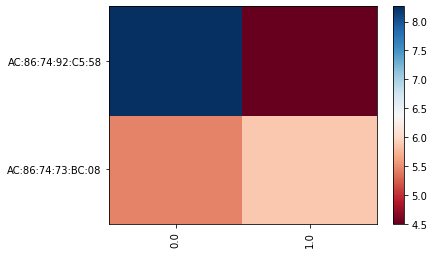

In [118]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [119]:
##### Now, grouping node_mac and associated columns by avg_signal column

In [120]:
avg_gptest = df_first[['node_mac','associated','avg_signal']]
grouped_avg = avg_gptest.groupby(['node_mac','associated'],as_index=False).mean()
grouped_avg

,node_mac,associated,avg_signal
0,AC:86:74:73:BC:08,0.0,-81.505378
1,AC:86:74:73:BC:08,1.0,-64.000000
2,AC:86:74:92:C5:58,0.0,-74.702395
3,AC:86:74:92:C5:58,1.0,-58.000000


In [121]:
avg_pivot = grouped_avg.pivot(index='node_mac',columns='associated')
avg_pivot

avg_signal      
associated               0.0   1.0
node_mac                          
AC:86:74:73:BC:08 -81.505378 -64.0
AC:86:74:92:C5:58 -74.702395 -58.0

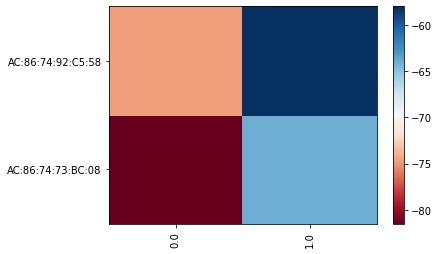

In [122]:
fig, ax = plt.subplots()
im = ax.pcolor(avg_pivot, cmap='RdBu')

#label names
row_labels = avg_pivot.columns.levels[1]
col_labels = avg_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(avg_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(avg_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [123]:
df_first

,mac,count,min_signal,max_signal,avg_signal,last_seen_signal,first_seen,last_seen,associated,node_mac
0,00:71:c2:19:b4:f5,6.0,-78.0,-58.0,-65.0,-68.0,1970-01-01 00:00:01.583035162,1970-01-01 00:00:01.583035163,0.0,AC:86:74:92:C5:58
2,00:71:c2:19:b4:f5,12.0,-80.0,-62.0,-68.0,-64.0,1970-01-01 00:00:01.583035161,1970-01-01 00:00:01.583035172,0.0,AC:86:74:73:BC:08
4,7a:fc:1e:9a:a9:ae,2.0,-72.0,-69.0,-70.0,-69.0,1970-01-01 00:00:01.583035164,1970-01-01 00:00:01.583035164,0.0,AC:86:74:73:BC:08
5,d8:97:ba:42:71:3e,1.0,-88.0,-88.0,-88.0,-88.0,1970-01-01 00:00:01.583035165,1970-01-01 00:00:01.583035165,0.0,AC:86:74:73:BC:08
6,00:71:c2:19:b4:f5,17.0,-74.0,-55.0,-61.0,-70.0,1970-01-01 00:00:01.583035200,1970-01-01 00:00:01.583035220,0.0,AC:86:74:92:C5:58
...,...,...,...,...,...,...,...,...,...,...
9995,8a:2e:3b:f6:84:b7,6.0,-68.0,-64.0,-66.0,-64.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58
9996,92:46:45:fd:1d:21,13.0,-69.0,-58.0,-64.0,-58.0,1970-01-01 00:00:01.583063726,1970-01-01 00:00:01.583063738,0.0,AC:86:74:92:C5:58
9997,9e:70:ec:da:6d:b4,8.0,-78.0,-55.0,-62.0,-75.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58
9998,a4:77:33:6d:42:98,5.0,-90.0,-88.0,-89.0,-90.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58


In [124]:
last_seen_group = df_first.groupby('last_seen')['count'].mean().sort_values(ascending=False).to_frame()
last_seen_group

,count
last_seen,
1970-01-01 00:00:01.583048904,22.0
1970-01-01 00:00:01.583044410,22.0
1970-01-01 00:00:01.583046429,22.0
1970-01-01 00:00:01.583043429,22.0
1970-01-01 00:00:01.583039109,22.0
...,...
1970-01-01 00:00:01.583039723,1.0
1970-01-01 00:00:01.583058080,1.0
1970-01-01 00:00:01.583058074,1.0


#### node_mac

In [125]:
node_group = df_first.groupby('node_mac')['count'].count().to_frame()
node_group

,count
node_mac,
AC:86:74:73:BC:08,5461
AC:86:74:92:C5:58,4219


In [126]:
import seaborn as sns

In [127]:
df_first.node_mac.value_counts()

AC:86:74:73:BC:08    5461
AC:86:74:92:C5:58    4219
Name: node_mac, dtype: int64

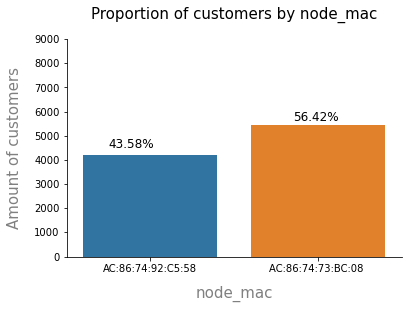

In [128]:
amount_first = df_first.node_mac.value_counts()[1] / df_first.shape[0] * 100
amount_second = df_first.node_mac.value_counts()[0] / df_first.shape[0] * 100

sns.countplot(x='node_mac', data=df_first)
plt.xticks([0, 1], ['AC:86:74:92:C5:58', 'AC:86:74:73:BC:08 '])
plt.xlabel('node_mac', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers by node_mac", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.25, 4500, f"{round(amount_first, 2)}%", fontsize=12)
plt.text(0.85, 5600, f"{round(amount_second, 2)}%", fontsize=12)
sns.despine()

In [129]:
df_first

,mac,count,min_signal,max_signal,avg_signal,last_seen_signal,first_seen,last_seen,associated,node_mac
0,00:71:c2:19:b4:f5,6.0,-78.0,-58.0,-65.0,-68.0,1970-01-01 00:00:01.583035162,1970-01-01 00:00:01.583035163,0.0,AC:86:74:92:C5:58
2,00:71:c2:19:b4:f5,12.0,-80.0,-62.0,-68.0,-64.0,1970-01-01 00:00:01.583035161,1970-01-01 00:00:01.583035172,0.0,AC:86:74:73:BC:08
4,7a:fc:1e:9a:a9:ae,2.0,-72.0,-69.0,-70.0,-69.0,1970-01-01 00:00:01.583035164,1970-01-01 00:00:01.583035164,0.0,AC:86:74:73:BC:08
5,d8:97:ba:42:71:3e,1.0,-88.0,-88.0,-88.0,-88.0,1970-01-01 00:00:01.583035165,1970-01-01 00:00:01.583035165,0.0,AC:86:74:73:BC:08
6,00:71:c2:19:b4:f5,17.0,-74.0,-55.0,-61.0,-70.0,1970-01-01 00:00:01.583035200,1970-01-01 00:00:01.583035220,0.0,AC:86:74:92:C5:58
...,...,...,...,...,...,...,...,...,...,...
9995,8a:2e:3b:f6:84:b7,6.0,-68.0,-64.0,-66.0,-64.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58
9996,92:46:45:fd:1d:21,13.0,-69.0,-58.0,-64.0,-58.0,1970-01-01 00:00:01.583063726,1970-01-01 00:00:01.583063738,0.0,AC:86:74:92:C5:58
9997,9e:70:ec:da:6d:b4,8.0,-78.0,-55.0,-62.0,-75.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58
9998,a4:77:33:6d:42:98,5.0,-90.0,-88.0,-89.0,-90.0,1970-01-01 00:00:01.583063744,1970-01-01 00:00:01.583063744,0.0,AC:86:74:92:C5:58


In [130]:
import matplotlib.pyplot as plt
%matplotlib inline